In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
service = pd.read_excel("data Training.xlsx", sheet_name="Service4w")

In [21]:
service.head()

,Astra_Id,VIN,PlatNumber,ServiceBranch,Mileage,SalesBranch,Billingdate,ProductCode,Brand,ModelType,ProductYear,PKBNo,PKBDate,PKBTypeDescription,PMCategory,AmountTotal
0,1000000029245531,MHFXS43G9E4012080,AG800PK,T470,41168.0,T470,2015-08-31 00:00:00.000,KU40VM/T40M,Toyota,INNOVA DIESEL,2014-01-01 00:00:00.0000000,T470SPA18004619,2018-04-06 00:00:00.0000000,Booking,50000KM,714971.0
1,1000000036604917,MHFXW42G882129476,B8623CW,T058,30322.0,T058,15.11.2008,TG40GA/T21M,Toyota,IMV,2008-01-01 00:00:00.0000000,100580253772,2011-02-09 00:00:00.0000000,Booking,30000KM,0.0
2,1000000089206392,MHF11KF8000060561,B8586DT,T262,266319.0,NaN,NaN,KF80LXNS,Toyota,KIJANG,2000-01-01 00:00:00.0000000,102620396688,2008-06-26 00:00:00.0000000,Walk In,PERIOD1,0.0
3,1000000097691492,MHKV1AA2J7K020859,B1033FY,D100,39993.0,D001,20.09.2007,F600RVGMDFJJM,Daihatsu,XENIA1.0,2007-01-01 00:00:00.0000000,D100SPA14006390,2014-05-14 00:00:00.0000000,Walk In,GR,823087.0
4,1000000092143466,MHKP3CA1JDK040963,E8197KN,D261,3590.0,D261,29.05.2013,S402RP-PMRFJJ-KG,Daihatsu,GMAXPU15,2013-01-01 00:00:00.0000000,D261SPA13008584,2013-08-16 00:00:00.0000000,Walk In,NaN,41800.0


In [22]:
service.replace('Nan',np.nan)
service.isnull().sum()

Astra_Id                0
VIN                     0
PlatNumber              0
ServiceBranch           0
Mileage                 0
SalesBranch           137
Billingdate           137
ProductCode             0
Brand                   0
ModelType               8
ProductYear             0
PKBNo                   0
PKBDate                 0
PKBTypeDescription      1
PMCategory             69
AmountTotal            22
dtype: int64

In [23]:
service.loc[service['PKBTypeDescription'].isnull(),'PKBTypeDescription']='Walk In'
service.loc[service['ModelType'].isnull(),'ModelType']='XENIA'
service = service[service['PMCategory'].notnull()]
service = service[service['AmountTotal'].notnull()]
service = service[service['Billingdate'].notnull()].reset_index()

In [24]:
r,c = service.shape

In [25]:
service.isnull().sum()

index                 0
Astra_Id              0
VIN                   0
PlatNumber            0
ServiceBranch         0
Mileage               0
SalesBranch           0
Billingdate           0
ProductCode           0
Brand                 0
ModelType             0
ProductYear           0
PKBNo                 0
PKBDate               0
PKBTypeDescription    0
PMCategory            0
AmountTotal           0
dtype: int64

In [11]:
service.head(3)

,level_0,index,Astra_Id,VIN,PlatNumber,ServiceBranch,Mileage,SalesBranch,Billingdate,ProductCode,Brand,ModelType,ProductYear,PKBNo,PKBDate,PKBTypeDescription,PMCategory,AmountTotal
0,0,0,1000000029245531,MHFXS43G9E4012080,AG800PK,T470,41168.0,T470,2015-08-31 00:00:00.000,KU40VM/T40M,Toyota,INNOVA DIESEL,2014-01-01 00:00:00.0000000,T470SPA18004619,2018-04-06 00:00:00.0000000,Booking,50000KM,714971.0
1,1,1,1000000036604917,MHFXW42G882129476,B8623CW,T058,30322.0,T058,15.11.2008,TG40GA/T21M,Toyota,IMV,2008-01-01 00:00:00.0000000,100580253772,2011-02-09 00:00:00.0000000,Booking,30000KM,0.0
2,2,3,1000000097691492,MHKV1AA2J7K020859,B1033FY,D100,39993.0,D001,20.09.2007,F600RVGMDFJJM,Daihatsu,XENIA1.0,2007-01-01 00:00:00.0000000,D100SPA14006390,2014-05-14 00:00:00.0000000,Walk In,GR,823087.0


In [12]:
#membuat timeline dan day name
service['Billing_Date'] = pd.to_datetime(service['Billingdate'])
service['Billing_Day'] = service['Billing_Date'].dt.weekday_name
service['Billing_Week'] = np.where((service['Billing_Day']=='Saturday') | (service['Billing_Day']=='Sunday'), 
                                   'Weekend', 'Weekday' )

service['ProductYear_Date'] = pd.to_datetime(service['ProductYear'])
service['ProductYear_Day'] = service['ProductYear_Date'].dt.weekday_name
service['ProductYear_Week'] = np.where((service['ProductYear_Day']=='Saturday') | (service['ProductYear_Day']=='Sunday'), 
                                   'Weekend', 'Weekday' )

service['PKB_Date'] = pd.to_datetime(service['PKBDate'])
service['PKB_Day'] = service['PKB_Date'].dt.weekday_name
service['PKB_Week'] = np.where((service['PKB_Day']=='Saturday') | (service['PKB_Day']=='Sunday'), 
                                   'Weekend', 'Weekday' )

service = service.drop(['Billingdate','ProductYear','PKBDate'], axis=1)

In [15]:
service.head()

,level_0,index,Astra_Id,VIN,PlatNumber,ServiceBranch,Mileage,SalesBranch,ProductCode,Brand,...,AmountTotal,Billing_Date,Billing_Day,Billing_Week,ProductYear_Date,ProductYear_Day,ProductYear_Week,PKB_Date,PKB_Day,PKB_Week
0,0,0,1000000029245531,MHFXS43G9E4012080,AG800PK,T470,41168.0,T470,KU40VM/T40M,Toyota,...,714971.0,2015-08-31,Monday,Weekday,2014-01-01,Wednesday,Weekday,2018-04-06,Friday,Weekday
1,1,1,1000000036604917,MHFXW42G882129476,B8623CW,T058,30322.0,T058,TG40GA/T21M,Toyota,...,0.0,2008-11-15,Saturday,Weekend,2008-01-01,Tuesday,Weekday,2011-02-09,Wednesday,Weekday
2,2,3,1000000097691492,MHKV1AA2J7K020859,B1033FY,D100,39993.0,D001,F600RVGMDFJJM,Daihatsu,...,823087.0,2007-09-20,Thursday,Weekday,2007-01-01,Monday,Weekday,2014-05-14,Wednesday,Weekday
3,3,5,1000000002598963,MHFZX69G987008501,B2018S,T110,209531.0,T209,TG61GA/T11M,Toyota,...,5637914.0,2008-05-31,Saturday,Weekend,2008-01-01,Tuesday,Weekday,2015-06-06,Saturday,Weekend
4,4,6,1000000045712608,MHKG2CK2JBK007226,BK7816ZX,D560,300.0,D560,F700RGTXATMC,Daihatsu,...,1764001.0,2011-01-17,Monday,Weekday,2011-01-01,Saturday,Weekend,2011-01-28,Friday,Weekday


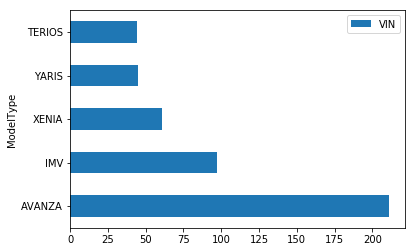

In [13]:
plt.figure(figsize=(20,20))
top5ModelType = pd.DataFrame(service.groupby('ModelType').count().sort_values(by='VIN', ascending=False)['VIN'].iloc[0:5])
top5ModelType.plot.barh()
plt.show()

In [14]:
#membuat timeline dan day name
service['Billing_Date'] = pd.to_datetime(service['Billingdate'])
service['Billing_Date'] = pd.to_datetime(service['Billingdate'])
service['Billing_Date'] = pd.to_datetime(service['Billingdate'])

# history['PKB_Day'] = history['Date'].dt.weekday_name

#membuat kolom kategorik weekend dan weekday
# history['PKB_Week'] = np.where((history['Day']=='Saturday') | (history['Day']=='Sunday'), 'Weekend', 'Weekday' )

KeyError: 'Billingdate'

In [ ]:
service.nunique()

In [ ]:
service.groupby('Brand').size()